In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ge-2024-results/GE_2024_Results (1).csv


In [76]:
df = pd.read_csv('/kaggle/input/ge-2024-results/GE_2024_Results (1).csv')
df

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...,...
8901,8899,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,8900,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,8904,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,8901,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


In [77]:
df.shape

(8906, 10)

In [79]:
df=df.drop('ID',axis=1)

In [80]:
df.head(21)

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost
9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JUSTIN TRUDEAU,Congress,NaN,NaN,NaN,NaN,Lost


In [81]:
df.columns

Index(['State', 'Constituency', 'Candidate', 'Party', 'EVM Votes',
       'Postal Votes', 'Total Votes', '% of Votes', 'Result'],
      dtype='object')

In [82]:
df

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,JOE BIDEN,Congress,NaN,NaN,NaN,NaN,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
...,...,...,...,...,...,...,...,...,...
8901,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8902,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8903,Andaman & Nicobar Islands,Andaman & Nicobar Islands,Hillary Clinton,Congress,NaN,NaN,NaN,NaN,Lost
8904,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


In [83]:
df.dropna(inplace=True)

In [84]:
df.reset_index(drop=True,inplace=True)

In [85]:
df

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436.0,50.58,Won
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
...,...,...,...,...,...,...,...,...,...
8897,West Bengal,Uluberia,SK. SAPIYAR ALI,Independent,2924,-,2924.0,0.21,Lost
8898,West Bengal,Uluberia,NIKHIL BERA,Socialist Unity Centre Of India (COMMUNIST),2095,12,2107.0,0.15,Lost
8899,West Bengal,Uluberia,AMAL KUMAR BARMAN,Independent,1997,3,2000.0,0.14,Lost
8900,West Bengal,Uluberia,RAMPRASAD GHORAI,Indian Unity Centre,1568,4,1572.0,0.11,Lost


In [86]:
df1 = df.loc[df['State']=='Telangana']
df1.sort_values(["Total Votes"],ascending=False)
df1.head(5)


,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
6800,Telangana,Adilabad,GODAM NAGESH,Bharatiya Janata Party,558936,9232,568168.0,45.98,Won
6801,Telangana,Adilabad,ATHRAM SUGUNA,Indian National Congress,472333,5183,477516.0,38.65,Lost
6802,Telangana,Adilabad,ATHRAM SAKKU,Bharat Rashtra Samithi,136463,837,137300.0,11.11,Lost
6803,Telangana,Adilabad,MALOTHU SYAMLAL NAYAK,Alliance of Democratic Reforms Party,7489,10,7499.0,0.61,Lost
6804,Telangana,Adilabad,MESRAM JANGUBAPU,Bahujan Samaj Party,6689,55,6744.0,0.55,Lost


In [87]:
df.groupby('State')['Total Votes'].sum()

State
Andaman & Nicobar Islands                 202514.0
Andhra Pradesh                          33729342.0
Arunachal Pradesh                         723247.0
Assam                                   20059870.0
Bihar                                   43448949.0
Chandigarh                                449275.0
Chhattisgarh                            15061348.0
Dadra & Nagar Haveli and Daman & Diu      297998.0
Goa                                       906538.0
Gujarat                                 29115599.0
Haryana                                 13055572.0
Himachal Pradesh                         4069906.0
Jammu and Kashmir                        5151193.0
Jharkhand                               17241982.0
Karnataka                               38793617.0
Kerala                                  19980436.0
Ladakh                                    135524.0
Lakshadweep                                49200.0
Madhya Pradesh                          37940251.0
Maharashtra              

In [88]:
df.dtypes

State            object
Constituency     object
Candidate        object
Party            object
EVM Votes        object
Postal Votes     object
Total Votes     float64
% of Votes       object
Result           object
dtype: object

In [89]:
df['% of Votes']=pd.to_numeric(df['% of Votes'],errors='coerce')

In [90]:
dft=df.groupby('State')['Total Votes'].sum().reset_index()
sum=dft['Total Votes'].sum()
dft['Percent']=(dft['Total Votes']/sum)*100
dft

,State,Total Votes,Percent
0,Andaman & Nicobar Islands,202514.0,0.031380
1,Andhra Pradesh,33729342.0,5.226410
2,Arunachal Pradesh,723247.0,0.112068
3,Assam,20059870.0,3.108306
4,Bihar,43448949.0,6.732478
5,Chandigarh,449275.0,0.069616
6,Chhattisgarh,15061348.0,2.333778
7,Dadra & Nagar Haveli and Daman & Diu,297998.0,0.046175
8,Goa,906538.0,0.140469
9,Gujarat,29115599.0,4.511504


In [91]:
df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(5)

Party
Bharatiya Janata Party          235973935.0
Indian National Congress        136759064.0
Samajwadi Party                  29549381.0
All India Trinamool Congress     28213393.0
Independent                      17844442.0
Name: Total Votes, dtype: float64

In [92]:
df2=df.loc[df['Result']=='Lost']
df2.sort_values(['% of Votes'],ascending=False)
df2.head(10)

,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040.0,38.54,Lost
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254.0,4.08,Lost
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017.0,2.97,Lost
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203.0,1.09,Lost
5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K J B SELVARAJ,All India Anna Dravida Munnetra Kazhagam,911,3,914.0,0.45,Lost
6,Andaman & Nicobar Islands,Andaman & Nicobar Islands,DR ARUN KUMAR MALLIK,Bahujan Samaj Party,714,5,719.0,0.36,Lost
7,Andaman & Nicobar Islands,Andaman & Nicobar Islands,RINKU MALA MONDAL,Independent,539,3,542.0,0.27,Lost
8,Andaman & Nicobar Islands,Andaman & Nicobar Islands,K VENKAT RAM BABU,Independent,506,1,507.0,0.25,Lost
9,Andaman & Nicobar Islands,Andaman & Nicobar Islands,USHA KUMARI,Independent,378,2,380.0,0.19,Lost
10,Andaman & Nicobar Islands,Andaman & Nicobar Islands,SALAMAT MONDAL,Socialist Unity Centre Of India (COMMUNIST),349,2,351.0,0.17,Lost


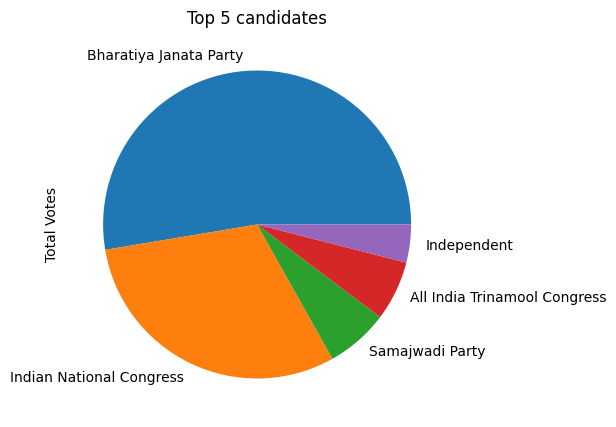

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.title('Top 5 candidates')
plt.show()

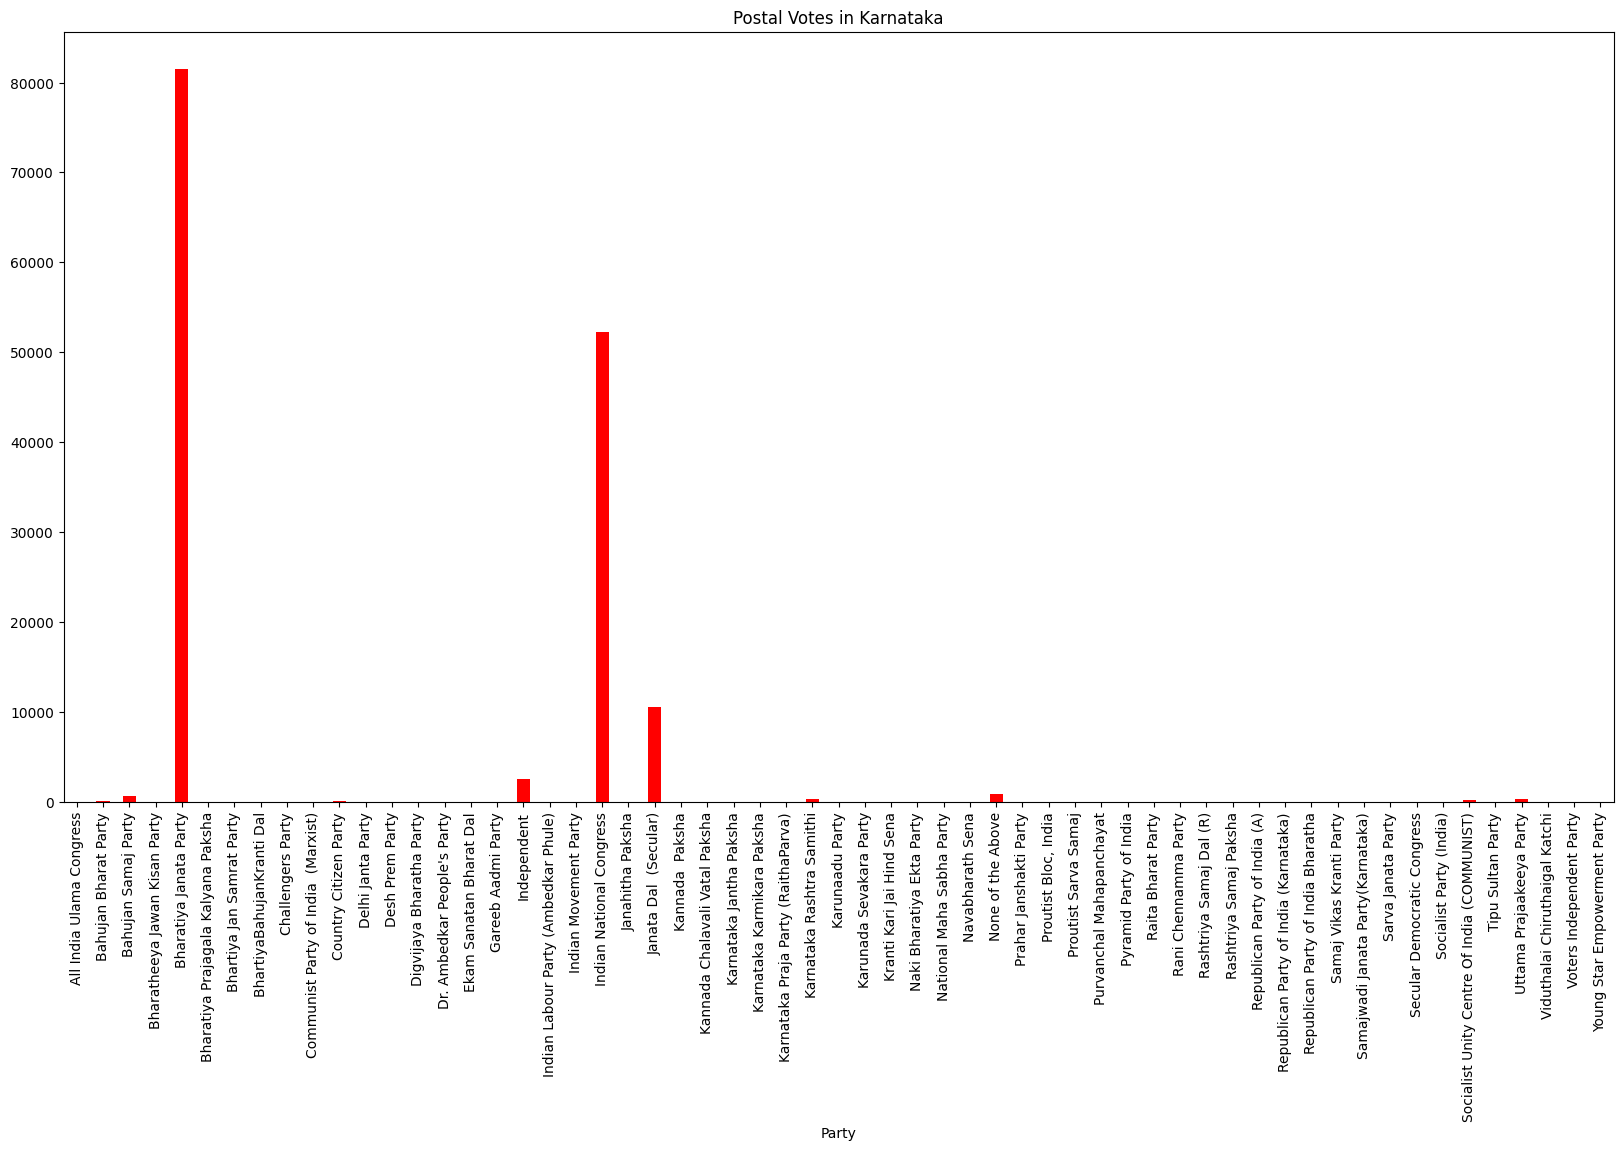

In [101]:
plt.figure(figsize=(20,10))
df['Postal Votes']=pd.to_numeric(df['Postal Votes'],errors='coerce')
df3=df.loc[df['State']=='Karnataka']
df3.groupby('Party')['Postal Votes'].sum().plot(kind='bar',color='red')
plt.title('Postal Votes in Karnataka')
plt.show()